In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from   sedpy import attenuation
import fsps
from   cycler import cycler
import matplotlib

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

In [2]:
wl = np.arange(1000,10000,0.5)
wlinv = (wl*1e-4)**-1

In [3]:
cardelli = attenuation.cardelli(wl)
calzetti = attenuation.calzetti(wl,R_v=3.1)
powerlaw = attenuation.powerlaw(wl)
lmc      = attenuation.lmc(wl)
smc      = attenuation.smc(wl)

## Common attenuation curves

In the figure below are plotted some of the most common attenuation curves used in literature including the Cardelli attenuation curve for the Milky way, the Calzetti curve for star burst galaxies (notice the lack of the bump), the attenuation profiles found for the Large and Small Magellenic Clouds (note that the LMC shows the bump while the SMC is closer to a star forming galaxy curve) and a simple power law attenuation curve. 

**All the attenuation curves are plotted for $R_V$ = 3.1**

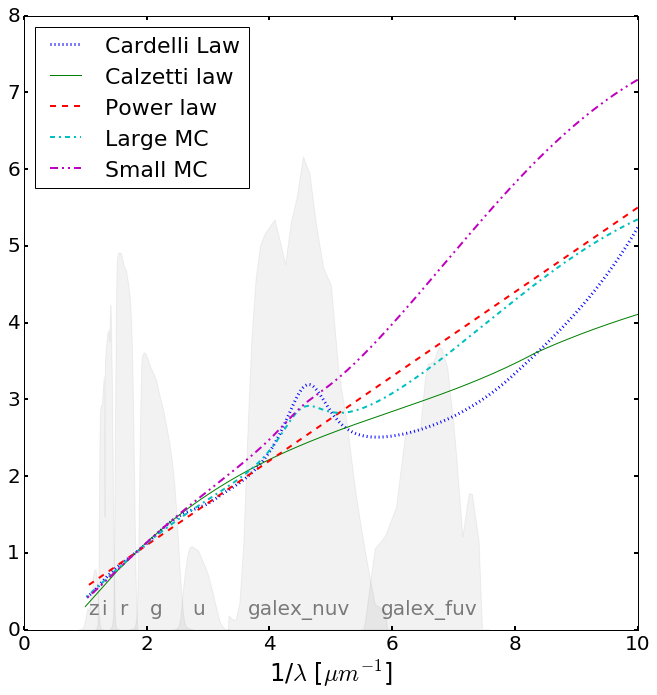

In [4]:
fig,ax = plt.subplots(figsize=(11,11))
ax.plot(wlinv,cardelli,':' ,label='Cardelli Law',linewidth=3)
ax.plot(wlinv,calzetti,'-',label='Calzetti law',linewidth=1)
ax.plot(wlinv,powerlaw,'--',label='Power law',linewidth=2)
line1, = ax.plot(wlinv,lmc,'-',label='Large MC',linewidth=2)
line1.set_dashes([5,4,2,4])
line2, = ax.plot(wlinv,smc,'-', label='Small MC',linewidth=2)
line2.set_dashes([8,4,2,4,2,4])
ax.set_xlabel(r'1/$\lambda$ [$\mu m^{-1}$]',fontsize=24)
ax.legend(loc=2,fontsize=22)

## Overplot filters
sdss = fsps.find_filter('sdss')
galex = fsps.find_filter('galex')

ax.set_prop_cycle(cycler('color',['r','g','b','y','c','m','darkorange']))
for i in range(np.size(sdss)):
    f = fsps.get_filter(sdss[i])
    ax.fill_between((f.transmission[0]*1e-4)**-1,10*f.transmission[1],label=f.name,alpha=0.1,color='gray')
    ax.annotate(f.name[5],xy=((f.lambda_eff*1e-4)**-1,10*f.transmission[1].max()),#textcoords='offset points',
                xytext=((f.lambda_eff*1e-4)**-1-0.07,0.2),fontsize=20,alpha=0.5)

    
for i in range(np.size(galex)):
    f = fsps.get_filter(galex[i])
    ax.fill_between((f.transmission[0]*1e-4)**-1,f.transmission[1]/10,label=f.name,alpha=0.1,color='gray')
    ax.annotate(f.name,xy=((f.lambda_eff*1e-4)**-1,f.transmission[1].max()/10),#textcoords='offset points',
                xytext=((f.lambda_eff*1e-4)**-1-0.7,0.2),fontsize=20,alpha=0.5)
    
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
#fig.savefig('atten_filters.png', format='png', dpi=1200)

## The Conroy attenuation curve

The Conroy attenuation curve closely matches the Cardelli law till the far UV where it predicts a steeper attenuation than the Cardelli law. It also allows for a varying bump fraction from no bump ($f_{bump}=0$) to that of the Cardelli law ($f_{bump}=1$).

**The Conroy attenuation law has the same bump aplitude as the Cardelli law for a bump fraction of 1.**

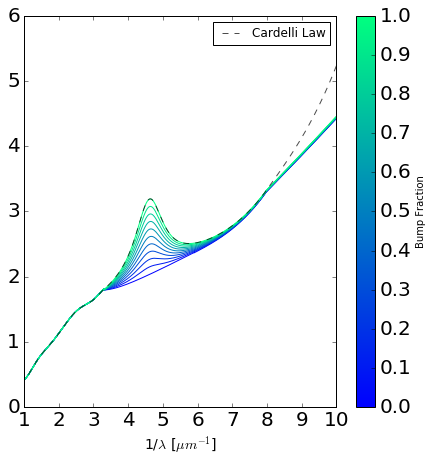

In [5]:
bump = np.arange(0,1.1,0.1)

norm = matplotlib.colors.Normalize(vmin=np.min(bump),vmax=np.max(bump))
c_m = matplotlib.cm.winter

s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

plt.figure(2,figsize=(7,7))
for i in bump:
    plt.plot(wlinv,attenuation.conroy(wl,f_bump=i),color=s_m.to_rgba(i))

plt.colorbar(s_m,label='Bump Fraction')
plt.plot(wlinv,cardelli,'k--' ,label='Cardelli Law',linewidth=1,alpha=0.7)

plt.xlabel(r'1/$\lambda$ [$\mu m^{-1}$]',fontsize=14)

plt.legend()

# (d)

### Filters to best study the Conroy attenuation curve

To determine which bump fraction of the Conroy attenuation law best fits a dust attenuated region, I selected four filters in the UV. Any one of these filters should be useful in constraining the bump fraction.

1. HST WFC3 F225W
2. HST WFC3 F218W
3. UVOT M2
4. GALEX NUV

Of these, the narrow band **HST F218W** and the **UVOT M2** filters have lesser contamination from the continuum.

In [6]:
uv_filters = [fsps.find_filter('wfc3_uvis_f225w'), fsps.find_filter('wfc3_uvis_f218w'),
              fsps.find_filter('uvot_m2'), fsps.find_filter('galex_nuv')]

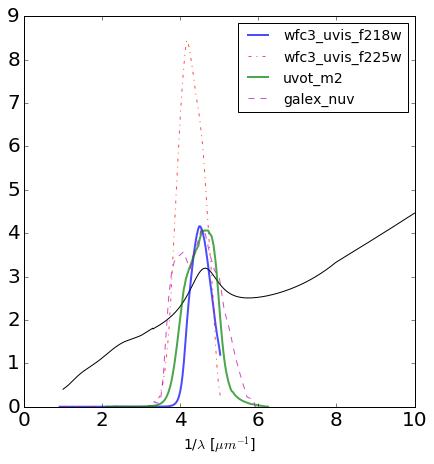

In [7]:
fig2,ax2 = plt.subplots(figsize=(7,7))

ax2.plot(wlinv,attenuation.conroy(wl,f_bump=1),'k')

for f in uv_filters:
    ax2.plot()

f=fsps.get_filter('wfc3_uvis_f218w')
ax2.plot((f.transmission[0]*1e-4)**-1,100*f.transmission[1],'b',label=f.name,alpha=0.7,linewidth=2)
f=fsps.get_filter('wfc3_uvis_f225w')
ax2.plot((f.transmission[0]*1e-4)**-1,100*f.transmission[1],'r-.',label=f.name,alpha=0.7)
f=fsps.get_filter('uvot_m2')
ax2.plot((f.transmission[0]*1e-4)**-1,f.transmission[1]/5,'g',label=f.name,alpha=0.7,linewidth=2)
f=fsps.get_filter('galex_nuv')
ax2.plot((f.transmission[0]*1e-4)**-1,f.transmission[1]/15,'m--',label=f.name,alpha=0.7,linewidth=1)

ax2.set_xlabel(r'1/$\lambda$ [$\mu m^{-1}$]',fontsize=14)
ax2.legend(fontsize=14)

### Corrections:

You want to pick a series of filters from (preferably) the same instrument, covering both the continuum and the bump. The perfect filters for this are the three UVOT filters from Swift. They are plotted below along with the Conroy attenuation curve for F-bump=1.

Each of the three filters covers both a portion of the bump and the continuum.

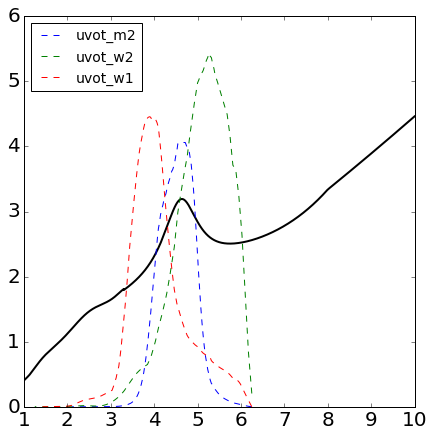

In [8]:
fig3,ax3 = plt.subplots(figsize=(7,7))

ax3.plot(wlinv,attenuation.conroy(wl,f_bump=1),'k',linewidth=2)

uvot_filters = fsps.find_filter('uvot')
for fil in uvot_filters:
    f = fsps.get_filter(fil)
    ax3.plot((f.transmission[0]*1e-4)**-1,f.transmission[1]/5,'--',label=f.name)
ax3.legend(loc=2,fontsize=14)